In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



**DecisionTreeClassifier**

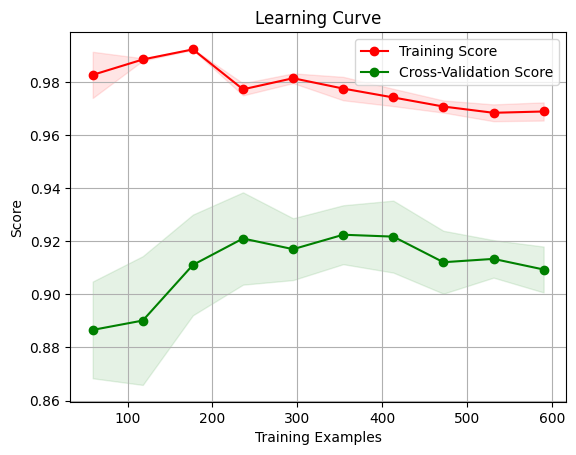

Precision: 1.00
Recall: 0.82
F1 Score: 0.90
Accuracy: 0.93


In [10]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Read the data from the CSV file
data = pd.read_csv('/content/drive/MyDrive/WaterContentFrequency/dataset/leaf_data.csv')

# Loop to generate 10 sets of noisy data
noisy_data_list = []
for i in range(100):
    noisy_data = pd.DataFrame({
        'Timestamps': [1897515200698 + i * 1000],
        'Thickness (mm)': [0.25],
        'Frequency (THz)': [0.4],
        'Leaf age': [random.randint(2, 5)],
        'Leaf surface area': [random.randint(2, 3)],
        'Need Water': [random.choice([True, False])]
    })
    noisy_data_list.append(noisy_data)

# Concatenate existing data with the noisy data list
data = pd.concat([data] + noisy_data_list, ignore_index=True)

# Extract the features and target variable
X = data[['Timestamps', 'Thickness (mm)', 'Frequency (THz)', 'Leaf age', 'Leaf surface area']]
y = data['Need Water']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Decision Tree classifier instance
clf = DecisionTreeClassifier(random_state=42)

# Calculate the learning curve
train_sizes, train_scores, test_scores = learning_curve(clf, X_train_scaled, y_train, cv=5, scoring='balanced_accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation of the training and testing scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Calculate precision, recall, F1 score, and accuracy
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
precision = precision_score(y_test, y_pred, pos_label=1)  # Calculate precision only for class 1
recall = recall_score(y_test, y_pred, pos_label=1)  # Calculate recall only for class 1
f1 = f1_score(y_test, y_pred, pos_label=1)  # Calculate F1 score only for class 1
accuracy = accuracy_score(y_test, y_pred)

# Plot the learning curve
plt.figure()
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')

plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-Validation Score')

plt.legend(loc='best')
plt.show()

# Display precision, recall, F1 score, and accuracy
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")

**RandomForestClassifier**

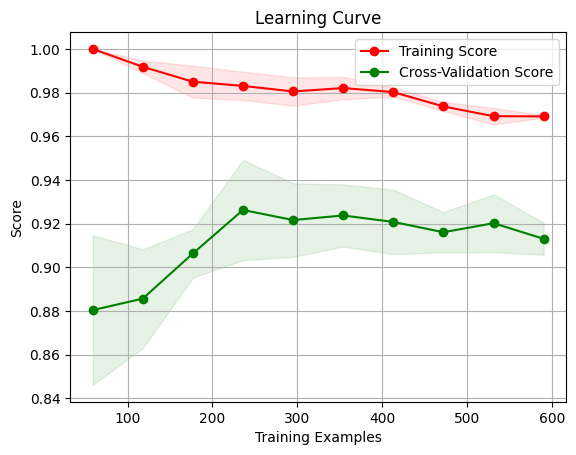

Precision: 0.85
Recall: 0.93
F1 Score: 0.89
Accuracy: 0.91


In [8]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Read the data from the CSV file
data = pd.read_csv('/content/drive/MyDrive/WaterContentFrequency/dataset/leaf_data.csv')

# Loop to generate 10 sets of noisy data
noisy_data_list = []
for i in range(100):
    noisy_data = pd.DataFrame({
        'Timestamps': [1897515200698 + i * 1000],
        'Thickness (mm)': [0.25],
        'Frequency (THz)': [0.4],
        'Leaf age': [random.randint(2, 5)],
        'Leaf surface area': [random.randint(2, 3)],
        'Need Water': [random.choice([True, False])]
    })
    noisy_data_list.append(noisy_data)

# Concatenate existing data with the noisy data list
data = pd.concat([data] + noisy_data_list, ignore_index=True)

# Extract the features and target variable
X = data[['Timestamps', 'Thickness (mm)', 'Frequency (THz)', 'Leaf age', 'Leaf surface area']]
y = data['Need Water']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Random Forest classifier instance
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Calculate the learning curve
train_sizes, train_scores, test_scores = learning_curve(clf, X_train_scaled, y_train, cv=5, scoring='balanced_accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation of the training and testing scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Calculate precision, recall, F1 score, and accuracy
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
precision = precision_score(y_test, y_pred, pos_label=1)  # Calculate precision only for class 1
recall = recall_score(y_test, y_pred, pos_label=1)  # Calculate recall only for class 1
f1 = f1_score(y_test, y_pred, pos_label=1)  # Calculate F1 score only for class 1
accuracy = accuracy_score(y_test, y_pred)

# Plot the learning curve
plt.figure()
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')

plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-Validation Score')

plt.legend(loc='best')
plt.show()

# Display precision, recall, F1 score, and accuracy
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")

**SVMClassifier**

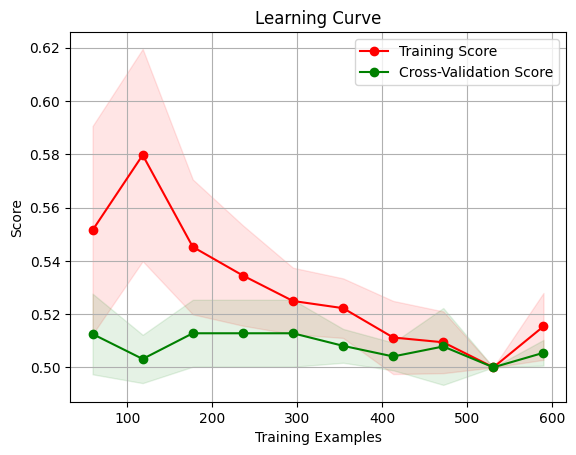

Precision: 0.25
Recall: 0.06
F1 Score: 0.10
Accuracy: 0.57


In [9]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Read the data from the CSV file
data = pd.read_csv('/content/drive/MyDrive/WaterContentFrequency/dataset/leaf_data.csv')

# Loop to generate 10 sets of noisy data
noisy_data_list = []
for i in range(100):
    noisy_data = pd.DataFrame({
        'Timestamps': [1897515200698 + i * 1000],
        'Thickness (mm)': [0.25],
        'Frequency (THz)': [0.4],
        'Leaf age': [random.randint(2, 5)],
        'Leaf surface area': [random.randint(2, 3)],
        'Need Water': [random.choice([True, False])]
    })
    noisy_data_list.append(noisy_data)

# Concatenate existing data with the noisy data list
data = pd.concat([data] + noisy_data_list, ignore_index=True)

# Extract the features and target variable
X = data[['Timestamps', 'Thickness (mm)', 'Frequency (THz)', 'Leaf age', 'Leaf surface area']]
y = data['Need Water']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an SVM classifier instance
clf = SVC(kernel='rbf', random_state=42)

# Calculate the learning curve
train_sizes, train_scores, test_scores = learning_curve(clf, X_train_scaled, y_train, cv=5, scoring='balanced_accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation of the training and testing scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Calculate precision, recall, F1 score, and accuracy
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
precision = precision_score(y_test, y_pred, pos_label=1)  # Calculate precision only for class 1
recall = recall_score(y_test, y_pred, pos_label=1)  # Calculate recall only for class 1
f1 = f1_score(y_test, y_pred, pos_label=1)  # Calculate F1 score only for class 1
accuracy = accuracy_score(y_test, y_pred)

# Plot the learning curve
plt.figure()
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')

plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-Validation Score')

plt.legend(loc='best')
plt.show()

# Display precision, recall, F1 score, and accuracy
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")

**KNNClassifier**

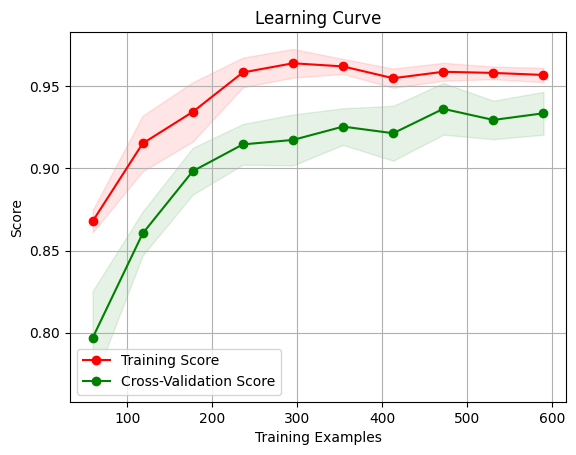

Precision: 0.88
Recall: 0.88
F1 Score: 0.88
Accuracy: 0.90


In [11]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Read the data from the CSV file
data = pd.read_csv('/content/drive/MyDrive/WaterContentFrequency/dataset/leaf_data.csv')

# Loop to generate 10 sets of noisy data
noisy_data_list = []
for i in range(100):
    noisy_data = pd.DataFrame({
        'Timestamps': [1497511200698 + i * 1000],
        'Thickness (mm)': [0.25],
        'Frequency (THz)': [0.4],
        'Leaf age': [random.randint(2, 5)],
        'Leaf surface area': [random.randint(2, 3)],
        'Need Water': [random.choice([True, False])]
    })
    noisy_data_list.append(noisy_data)

# Concatenate existing data with the noisy data list
data = pd.concat([data] + noisy_data_list, ignore_index=True)

# Extract the features and target variable
X = data[['Timestamps', 'Thickness (mm)', 'Frequency (THz)', 'Leaf age', 'Leaf surface area']]
y = data['Need Water']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a KNN classifier instance
clf = KNeighborsClassifier(n_neighbors=5)

# Calculate the learning curve
train_sizes, train_scores, test_scores = learning_curve(clf, X_train_scaled, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation of the training and testing scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Calculate precision, recall, F1 score, and accuracy
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Plot the learning curve
plt.figure()
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')

plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-Validation Score')

plt.legend(loc='best')
plt.show()

# Display precision, recall, F1 score, and accuracy
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")

**EnsembleClassifier**

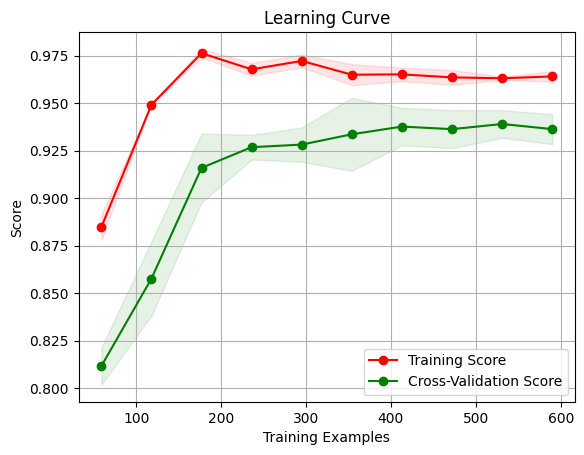

Precision: 1.00
Recall: 0.79
F1 Score: 0.88
Accuracy: 0.91


In [12]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Read the data from the CSV file
data = pd.read_csv('/content/drive/MyDrive/WaterContentFrequency/dataset/leaf_data.csv')

# Loop to generate 10 sets of noisy data
noisy_data_list = []
for i in range(100):
    noisy_data = pd.DataFrame({
        'Timestamps': [1497511200698 + i * 1000],
        'Thickness (mm)': [0.25],
        'Frequency (THz)': [0.4],
        'Leaf age': [random.randint(2, 5)],
        'Leaf surface area': [random.randint(2, 3)],
        'Need Water': [random.choice([True, False])]
    })
    noisy_data_list.append(noisy_data)

# Concatenate existing data with the noisy data list
data = pd.concat([data] + noisy_data_list, ignore_index=True)

# Extract the features and target variable
X = data[['Timestamps', 'Thickness (mm)', 'Frequency (THz)', 'Leaf age', 'Leaf surface area']]
y = data['Need Water']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create individual classifiers
svm_clf = SVC(random_state=42)
knn_clf = KNeighborsClassifier(n_neighbors=5)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)

# Create an ensemble of classifiers
clf = VotingClassifier(
    estimators=[('svm', svm_clf), ('knn', knn_clf), ('rf', rf_clf), ('dt', dt_clf)],
    voting='hard'
)

# Calculate the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    clf, X_train_scaled, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate the mean and standard deviation of the training and testing scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Calculate precision, recall, F1 score, and accuracy
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Plot the learning curve
plt.figure()
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')

plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-Validation Score')

plt.legend(loc='best')
plt.show()

# Display precision, recall, F1 score, and accuracy
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")